In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/merged_dataset.csv')

In [18]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols.remove('_id')
num_cols.remove('asset_allocation_id')

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('created')

['confidence', 'risk_tolerance', 'composure', 'impulsivity', 'impact_desire', 'asset_value']


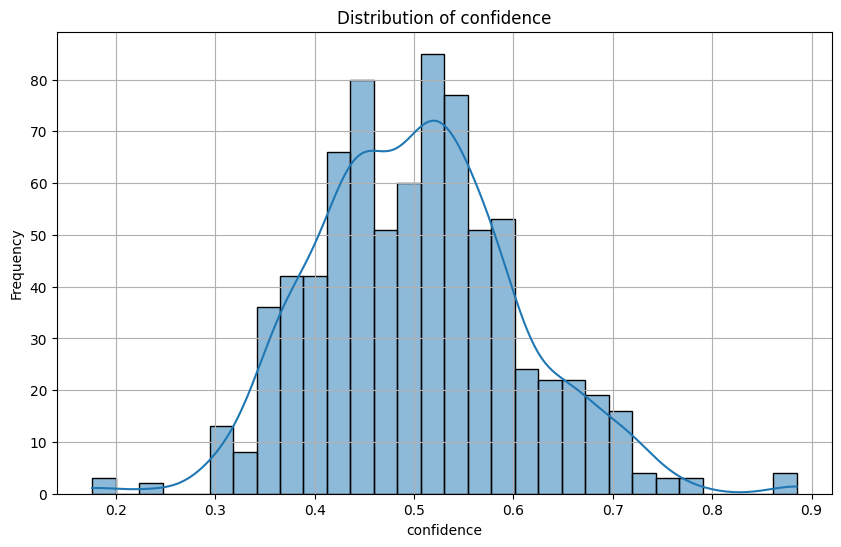

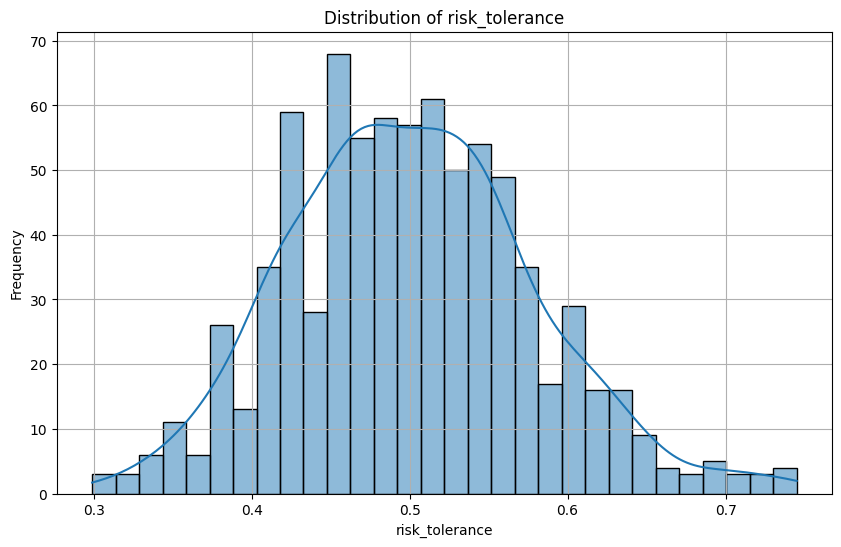

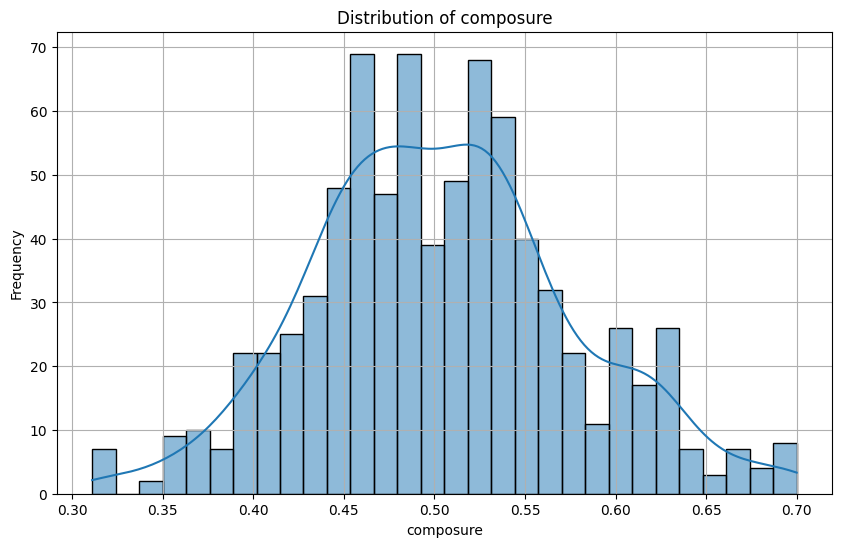

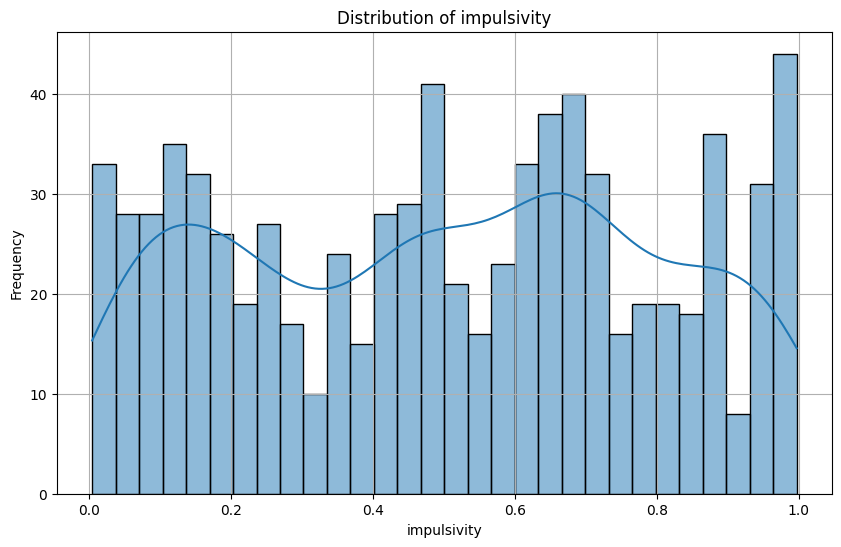

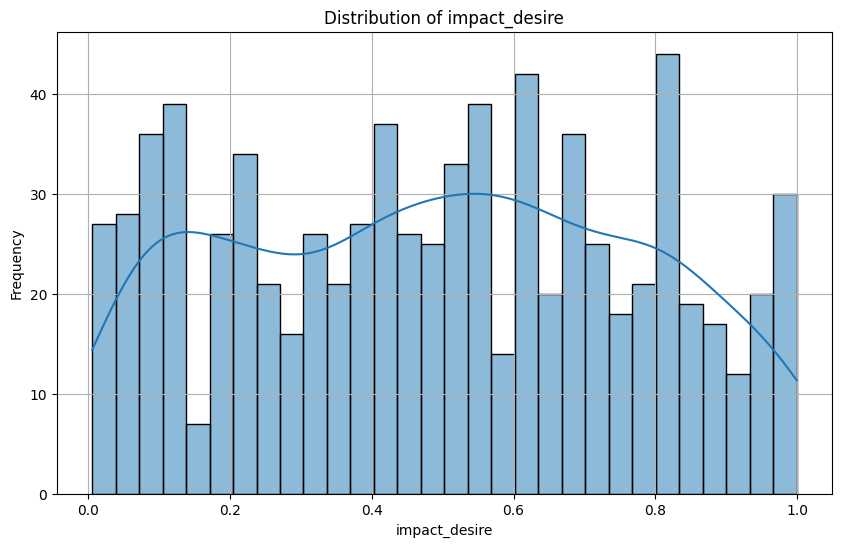

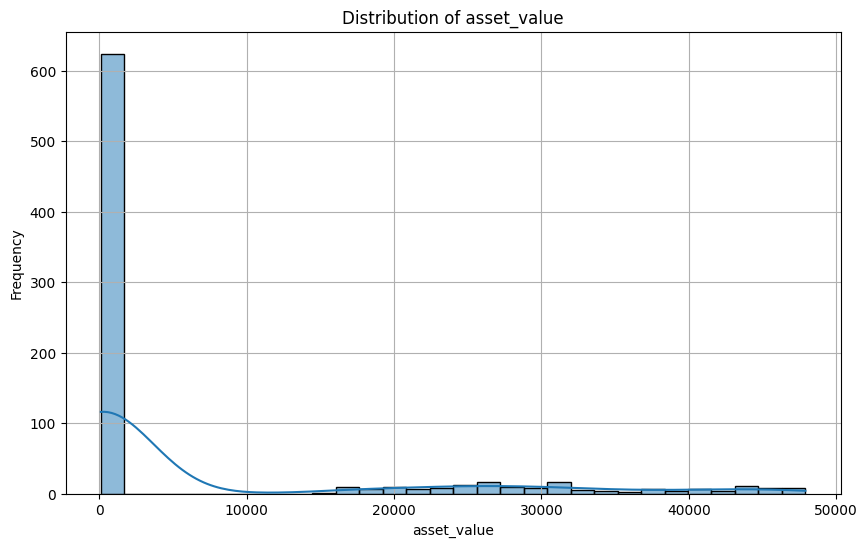

In [19]:
print(num_cols)

# Plotting numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

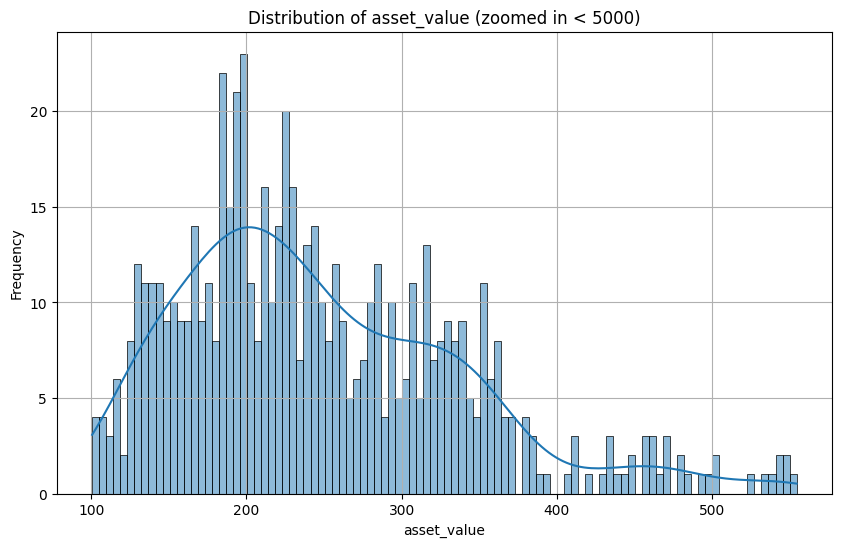

In [ ]:
asset_value_zoom = df[df['asset_value'] < 5000]['asset_value']

plt.figure(figsize=(10, 6))
sns.histplot(asset_value_zoom, kde=True, bins=100) # Adjusted bins for better visibility
plt.title(f'Distribution of asset_value (zoomed in < 5000)')
plt.xlabel('asset_value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

['asset_allocation', 'asset_currency']


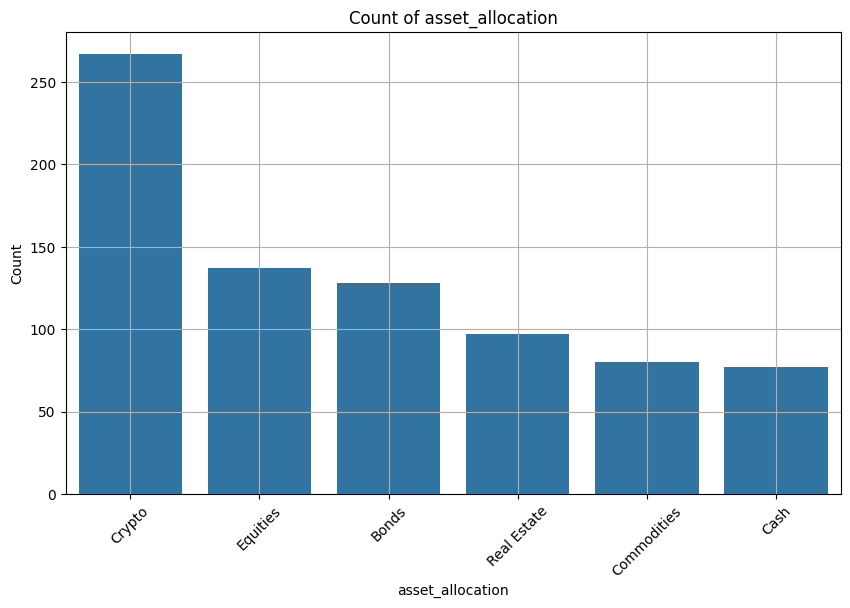

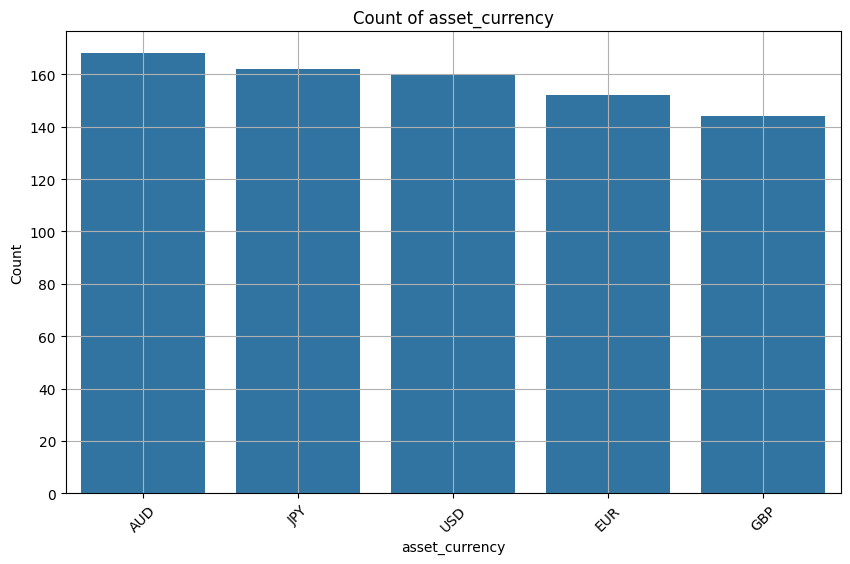

In [20]:
print(cat_cols)

# Plotting categorical columns
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

In [31]:
df.created.head()

0    2025-02-25T09:18:34.158728+00:00
1    2025-05-18T09:18:34.162165+00:00
2    2025-03-06T09:18:34.162165+00:00
3    2025-02-22T09:18:34.163356+00:00
4    2025-04-17T09:18:34.163356+00:00
Name: created, dtype: object

In [33]:
df['created'] = pd.to_datetime(df['created'])
frequency_by_date = df['created'].dt.date.value_counts().sort_index()

frequency_by_date

created
2025-02-21     7
2025-02-22    13
2025-02-23     7
2025-02-24     7
2025-02-25    10
              ..
2025-05-18    12
2025-05-19     4
2025-05-20     6
2025-05-21     5
2025-05-22     8
Name: count, Length: 91, dtype: int64

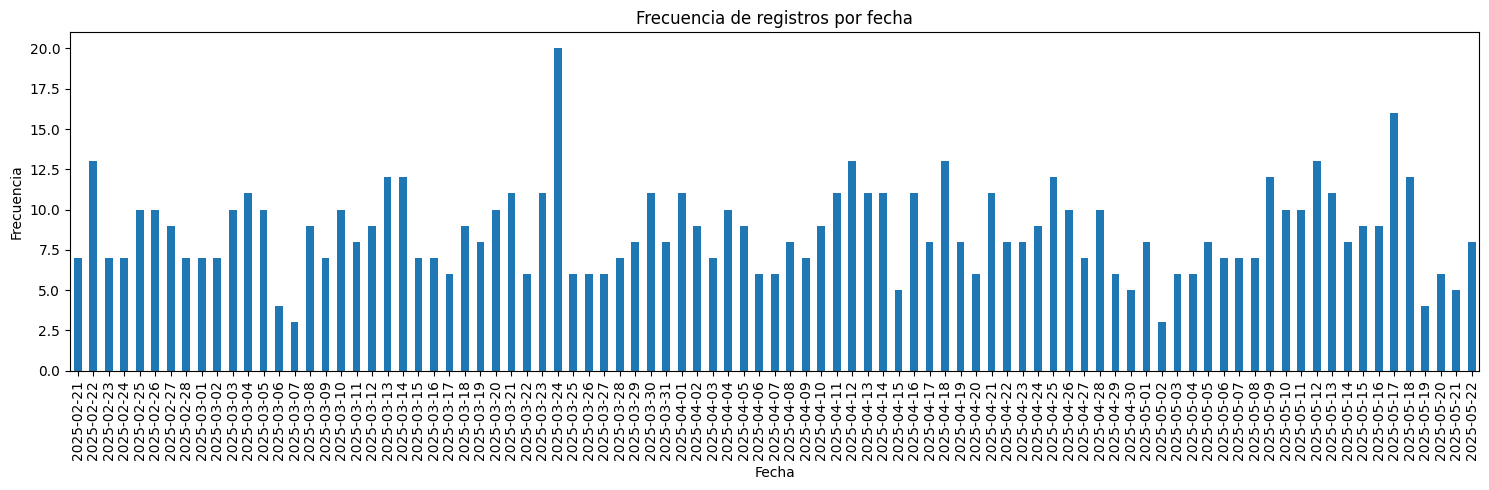

In [ ]:
frequency_by_date.plot(kind='bar', figsize=(15, 5))
plt.title("Frequency of Records by Date (not counting hours)")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()